## Kin selection

This is a simple model of the evolution of altruism via kin selection.

### background

Kin selection is one of the most important ideas in evolutionary biology, yet after a few beers most evolutionary scientists will confess that they do not really understand it. Part of the reason people have difficulty with the concept lies with the way it is typically taught. The standard exposition relies on a concept called 'genetic relatedness' that is quite technical; because it is technical, it is often defined in very vague terms, which leaves the student with a sense that the whole notion is a bit mystical.

In this model, I try to demystify kin selection by making the facts of relatedness as simple as possible: individuals reproduce asexually, and for that reason all siblings are clones of each other.

The conditions for altruism to evolve by kin selection can be succintly described by an inequation called Hamilton rule (more on this below). The standard exposition teaches that the $r$ parameter in Hamilton's rule corresponds to genetic relatedness. Because in our model, siblings are clones, it seems that $r$ should be $1$. But $r$ denotes something more subtle: it is a statistical concept, denoting the expected relatedness between individuals. In the model, $r$ controls the degree of assortment: how often individuals are paired with a sibling vs a random stranger. Since individuals cannot recognize their kin, the fitness of their strategy is determined by its average consequences, across encounters with siblings and strangers.


### basic mechanism
Each generation, every agent in a population plays a donation game with another agent, then all agents reproduce as a function of their relative fitness and die.

The donation game is a very simple game where player 1 can 'Cooperate', i.e. pay a cost of $c$ to give a benefit $b$ to player 2, or 'Defect'. Player 2 is a passive recipient.

Reproduction is asexual. Every agent who gets to reproduce contributes an even number of offspring to the next generation. This means that every agent has at least one sibling, who is a perfect clone of itself.

The strength of relatedness is manipulated by a parameter $r$, which regulates how likely an agent is to be paired with one of its (clonal) sibling, when playing the donation game. I.e. an agent plays the donation game with its sibling with probability $r$, and with a randomly selected individual with probability $1-r$. 

### dynamics
It is easy to show analytically (see next paragraph) that in such a setting, the ESS is to play Cooperate in the donation game if $rb > c$. This result is known as Hamilton's rule. One can check this in the agent-based model by manipulating the value of parameters $r$, $b$ and $c$.

### Analytical model

A cooperator meets a sibling with probability $r$, in which case it receives a benefit $b$ from its sibling (who is also necessarily a cooperator). With probability $1-r$, it meets a random individual, in which case it gets a payoff $p_c b$, where $p_c$ is the proportion of cooperators in the population. In every case, the cooperator pays a cost $c$ to deliver a benefit to its partner. Therefore we have:

Expected payoff of a cooperator = $rb + (1-r) p_c b - c$

A defector gets a payoff of $0$ when it meets a sibling, and a payoff $p_c b$ when meeting a random individual. Therefore we have:

Expected payoff of a defector = $(1-r) p_c b$

Altruism can evolve if and only if the expected payoff of a cooperator is greater than that of a defector, i.e.:
$$rb + (1-r) p_c b - c > (1-r) p_c b$$
which simplifies to $rb > c$.

Note that the result is the same regardless of the value of $p_c$: no matter the current value of cooperators in the population, the altruistic gene will increase in frequency provided that $rb > c$.

### colors for the graph
Running the model should produce a graph, at the bottom of this page, plotting the frequencies of different versions of the gene over time. Blue = Cooperation; Orange = Defection.

### things to try

You can try to modify the parameters below and see what happens.

In [1]:
#cost and benefit of helping
b = 30
c = -10

#rate of sibling interaction
r = .4

#the initial strategy played in the population (type "C" for "Cooperate" and "D" for "Defect")
initial_strategy = "D"

#population size
N = 100

#number of generations
g = 500

#mutation rate
mu = .01



### Import the necessary libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### General parameters of the model

In [3]:

#initial fitness
initial_fitness = 5

### Specific game parameters

In [4]:
#the strategy space
strategy_space = ["C", "D"]




### Define the "agent" class

In [5]:
#this tells the program what an agent looks like,
#e.g. it has fitness, is able to mutate, etc
class agent:
    def __init__(self, name, parent_name, strategy, fitness):
        self.name = name
        self.strategy = strategy
        self.fitness = fitness
        self.parent_name = parent_name
    
    def mutate(self):
        self.strategy=np.random.choice(strategy_space)
        
        
    def add_to_fitness(self, increment):
        self.fitness += increment

        
        

### Some key functions


In [6]:
def initialize():
    return([agent(i, 0, initial_strategy, initial_fitness) for i in range(N)])
    

In [7]:
#the function to compute average gene frequencies

def average_X(X):
    return len([i for i in pop if i.strategy == X])/N
   

In [8]:
#the successor function
#used to pairs an element in an array with its successor in that array,
#where the successor is either the next element,
#or the 0th element, if the focal element is the last element in the array

def successor(current, total):
    if current < total:
        return current + 1
    if current == total:
        return 0

In [9]:
#makes agents play games
#assortment is non-random: agents are more likely to play with their
#sibling, where the parameter r controls the degree of non-randomness
#of the assortment

def non_random_games():
    
    #this subfunction finds the sibling of a focal agent,
    #and makes the two agents play a game
    def find_sibling(i):
        player1 = arena[i]
        for j, val in enumerate(arena):
            player2 = val
            if pop[player1].parent_name == pop[player2].parent_name and i!=j:
                DG(player1, player2)
                break
                        
    #this subfunction finds a random other player,
    #and makes the two agents play a game                    
    def find_stranger(i):
        index_player1 = i
        index_player2 = successor(i, len(arena)-1)
        player1 = arena[index_player1]
        player2 = arena[index_player2]
        if (index_player1 != index_player2):
            DG(player1, player2)
    
    #creates an array where we put the names of every agent
    #in the population
    arena = []
    for i in range(N):
        arena.append(i) 
    #randomly shuffle the names inside the array
    np.random.shuffle(arena)
    
    #for every name in the array, make the corresponding agent play a game
    #with probability r, he is paired with its sibling
    #with probability 1-r, he is paired with a random player
    for i in range(len(arena)):
        random_number = np.random.uniform()
        if random_number < r :
            find_sibling(i)
        else:
            find_stranger(i)
            
    

In [10]:
#the donation game

def DG(player1, player2):
    player1_strat = pop[player1].strategy
    player2_strat = pop[player2].strategy
    
    if player1_strat == "C":
        pop[player2].add_to_fitness(b)
        pop[player1].add_to_fitness(c)
    
    
    


In [11]:
#the selection function and its building blocks

#standardize fitness so that agents with lowest fitness have fitness 1
def standardization():
        
        min_fitness = min([i.fitness for i in pop])
        for i in range(N):
            pop[i].fitness += (1 - min_fitness)
            

#each agent gets to put its name in a hat w times, where w is its fitness
def lottery_prep():
    hat = []
    for i in range(N):
        for j in range(pop[i].fitness):
            hat.append(pop[i].name)
    return hat

#create the next generation by drawing the name of the parents from the hat
def reproduction(hat):
    #for every even number from 0 to N-1, 
    #we select a parent by drawing a name from its hat
    #this parent makes two offspring, who get the same
    #'parent's name' tag identifying them as siblings
    temporary_pop=[]
    for i in range(N):
        if i%2 == 0:
            name_drawn = np.random.choice(hat)
            parent_name = name_drawn
            hereditary_package = [parent_name, pop[name_drawn].strategy]
            temporary_pop.append(agent(i, hereditary_package[0], hereditary_package[1], initial_fitness))
            temporary_pop.append(agent(i+1, hereditary_package[0], hereditary_package[1], initial_fitness))
    pop.clear()
    for i in range(N):
        pop.append(temporary_pop[i])



#the selection function

def selection():

    standardization()
    hat=lottery_prep()
    reproduction(hat)





In [12]:
#the mutation function
def mutation():
    for i in range(N):
        if (np.random.uniform() < mu):
            pop[i].mutate()

### Run the model and plot the dynamics

(0, 1.05)

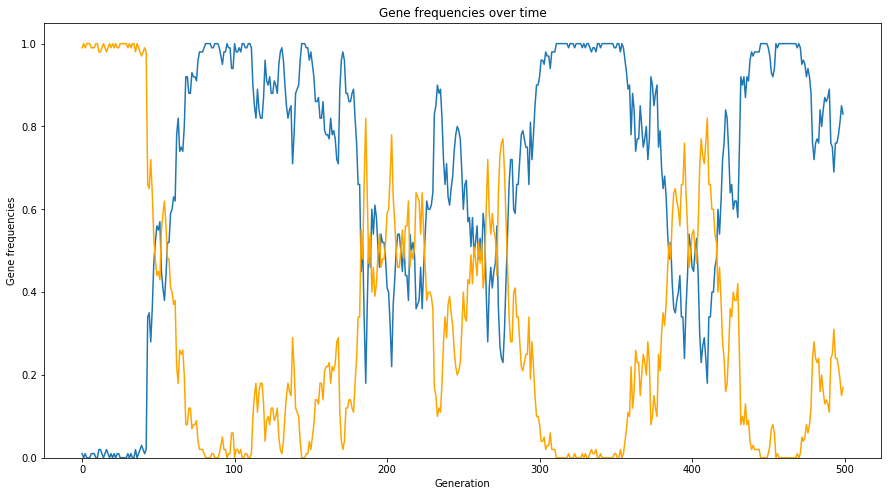

In [13]:
#Run model


#these arrays record allele frequencies across a run
Average_coop = []
Average_d = []



#initialize the population
pop = initialize()

#run the model for g generations
for i in range(g):
    non_random_games()
    selection()
    mutation()
    Average_coop.append(average_X("C"))
    Average_d.append(average_X("D"))

    
#plot the results
plt.figure( figsize=( 15, 8 ) )

plt.title('Gene frequencies over time')

plt.ylabel('Gene frequencies')
plt.xlabel('Generation')
plt.plot(Average_coop)
plt.plot(Average_d, color="orange")
plt.ylim(0,1.05)


### colors: Orange = Defect; Blue = Cooperate